In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
def get_from_lst(lst,value):
    """ Returns value if in list, returns "none" if not
    """
#     print(lst)
    lst = [x.strip(" ") for x in lst]
    if value in lst:
#         print(value)
        return value
    else:
        return "none"
    
def filter_by_value(df, column, value):
    """ Returns dataframe after filtering colums per value 
    """
    df["filter_cols"] = df[column].apply(lambda x: get_from_lst(x, value))
    df = df[df["filter_cols"] == value]
    df = df.drop("filter_cols", axis=1)
    return df

def get_most_frequent(df, column_name, n):
    flat = [i for i in df[column_name].values if len(i)>0]
    flat = sum(flat, [])
    c = Counter(flat)
    if column_name == "occupation":
        return c.most_common(n+1)[1:]
    return pd.DataFrame(c.most_common(n))

def get_unique_values_multilevel_categorical(df, column_name):
    flat = [i for i in df[column_name].values if len(i)>0]
    flat = sum(flat, [])
    keys = Counter(flat).keys()
    return keys, len(keys)

# lst = ["occupation", "party", "nationality"]
def print_most_frequent(df,n,lst):
    """ Prints top n most frequent values in every column from the passed list
    """
    for col in lst:
        print(get_most_frequent(df,col,n))
        
def get_df_numerical(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics)



def plot_correlation_map( df , title ,annot=True):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 12 }
    )
    
    plt.title(title, fontsize=24)

# Load data

In [3]:
df = pd.read_pickle("../data/final_sets/base/2016")

In [4]:
lst = ["occupation", "party", "nationality"]
for col in lst:
    keys, num = get_unique_values_multilevel_categorical(df, col)
    print("{} has {} unique values".format(col,num))

occupation has 3020 unique values
party has 3661 unique values
nationality has 342 unique values


In [5]:
print_most_frequent(df, 10, ["occupation", "party", "nationality"])

[('writer', 3188), ('scientist', 2164), ('journalist', 1357), ('economist', 779), ('lawyer', 721), ('historian', 599), ('sportsperson', 596), ('physician', 528), ('player', 404), ('actor', 384)]
                                  0     1
0  democratic party (united states)  3071
1  republican party (united states)  1767
2            independent politician   737
3          indian national congress   731
4          communist party of china   444
5            bharatiya janata party   334
6                 labour party (uk)   298
7           liberal party of canada   273
8            australian labor party   240
9           conservative party (uk)   234
            0     1
0    american  4788
1      indian  1926
2      french  1507
3      german  1325
4    canadian  1090
5   norwegian  1024
6       irish   905
7  australian   884
8     italian   681
9   pakistani   677


# Create country dataframes

In [6]:
us = filter_by_value(df,"nationality", "american")
us_n = get_df_numerical(us)
de = filter_by_value(df,"nationality", "german")
de_n = get_df_numerical(de)
gb = filter_by_value(df,"nationality", "british")
gb_n = get_df_numerical(gb)
fr = filter_by_value(df,"nationality", "french")
fr_n = get_df_numerical(fr)
ru = filter_by_value(df,"nationality", "russian")
ru_n = get_df_numerical(ru)

# United States

In [7]:
len(us)

4788

In [8]:
us.gender.value_counts()

male      4015
female     716
Name: gender, dtype: int64

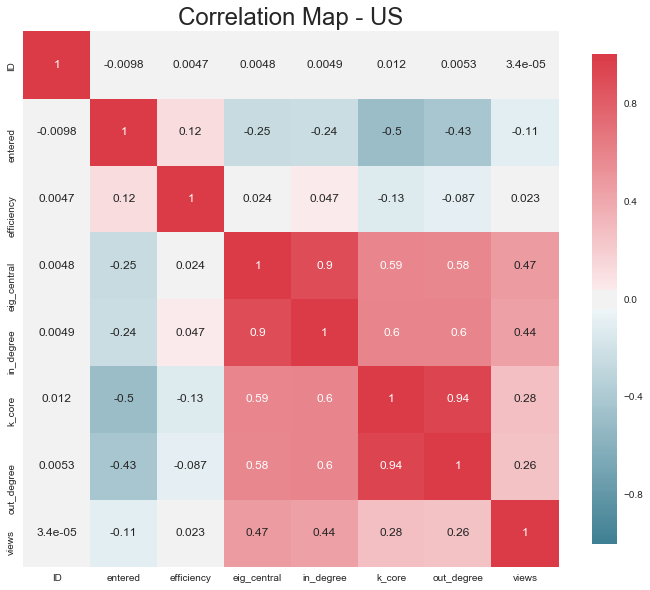

In [9]:
plot_correlation_map(us_n, "Correlation Map - US")

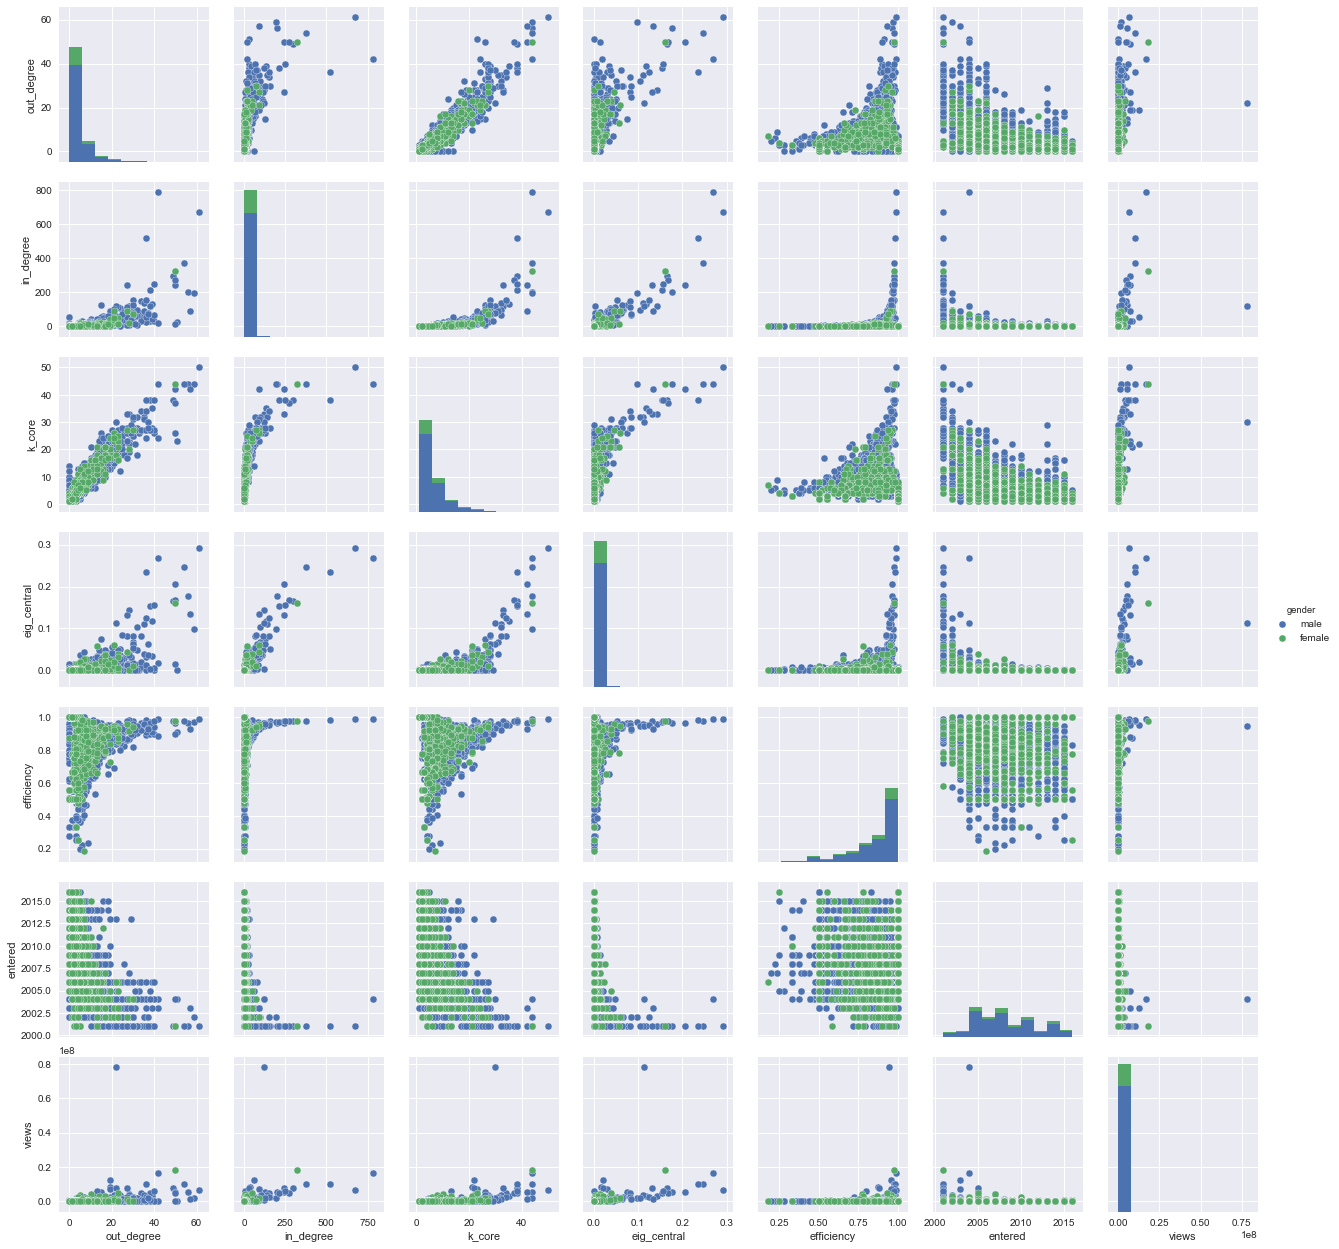

In [10]:
sns.pairplot(us[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

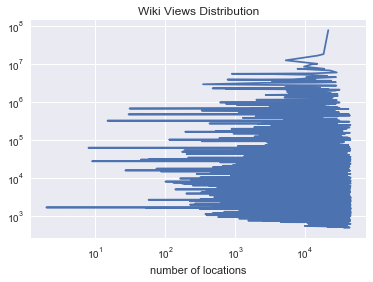

In [26]:
plt.xscale('log')
plt.yscale("log")
plt.title('Wiki Views Distribution')
plt.xlabel('number of locations')
# plt.ylabel('number of degrees')
plt.plot(us.views.sort_values())
plt.show()

In [19]:
us.views.describe().apply(lambda x: format(x, 'f'))

count        4788.000000
mean       110749.583333
std       1290290.297173
min           478.000000
25%          2505.750000
50%          5672.500000
75%         20886.000000
max      78237414.000000
Name: views, dtype: object

In [56]:
print_most_frequent(us, 15, ["occupation", "party"])

[('writer', 456), ('lawyer', 288), ('scientist', 185), ('sportsperson', 166), ('player', 149), ('journalist', 144), ('business', 114), ('actor', 67), ('physician', 66), ('teacher', 57), ('businessperson', 44), ('historian', 39), ('judge', 38), ('economist', 32), ('coach', 29)]
                                          0     1
0          democratic party (united states)  1906
1          republican party (united states)  1200
2                    independent politician    68
3               california democratic party    59
4                whig party (united states)    48
5               democratic-republican party    47
6                          federalist party    29
7               california republican party    19
8                 national republican party    16
9   american popular revolutionary alliance    15
10         green party of the united states    14
11  minnesota democratic–farmer–labor party    13
12       constitution party (united states)    10
13                    

# Germany

In [27]:
len(de)

1325

In [29]:
de.gender.value_counts()

male      1136
female     171
Name: gender, dtype: int64

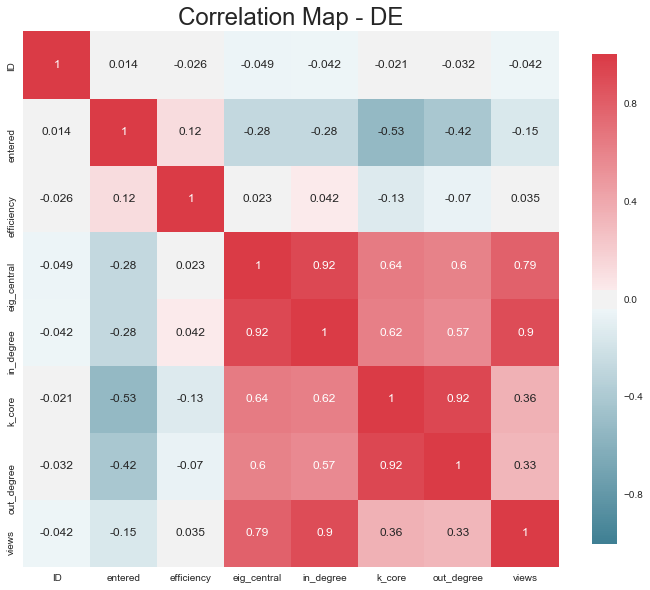

In [30]:
plot_correlation_map(de_n, "Correlation Map - DE")

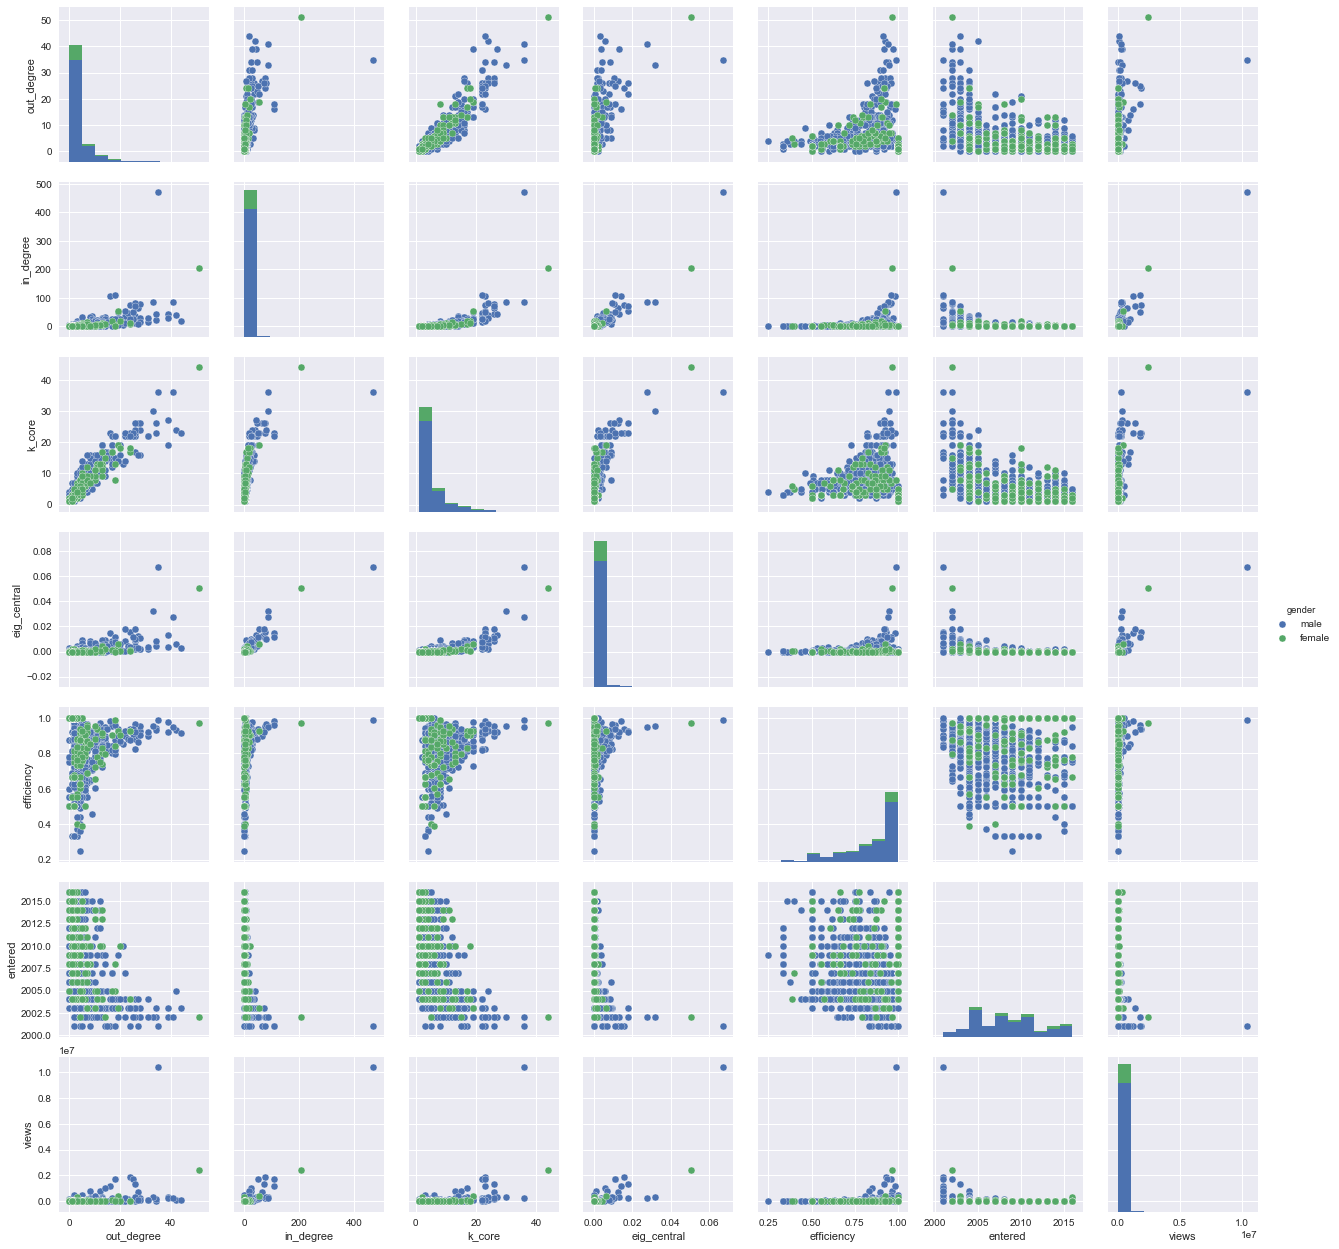

In [50]:
sns.pairplot(de[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

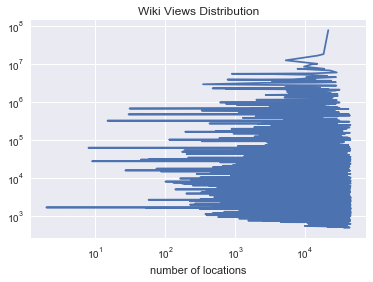

In [32]:
plt.xscale('log')
plt.yscale("log")
plt.title('Wiki Views Distribution')
plt.xlabel('number of locations')
# plt.ylabel('number of degrees')
plt.plot(us.views.sort_values())
plt.show()

In [34]:
de.views.describe().apply(lambda x: format(x, 'f'))

count        1325.000000
mean        35109.170566
std        314646.428918
min           489.000000
25%          1706.000000
50%          3820.000000
75%         10524.000000
max      10405306.000000
Name: views, dtype: object

In [57]:
print_most_frequent(de, 15, ["occupation", "party"])

[('writer', 169), ('scientist', 76), ('journalist', 63), ('historian', 35), ('economist', 34), ('lawyer', 32), ('physician', 13), ('diplomat', 9), ('novelist', 9), ('actor', 8), ('chemist', 6), ('political activist', 6), ('teacher', 5), ('jurist', 5), ('theology', 4)]
                                                 0    1
0               social democratic party of germany  143
1            christian democratic union of germany  119
2                                       nazi party   80
3                 socialist unity party of germany   58
4                       communist party of germany   47
5                  free democratic party (germany)   35
6                christian social union in bavaria   29
7                                       the greens   26
8                   german national people's party   20
9                           centre party (germany)   16
10                         german democratic party   16
11  independent social democratic party of germany   14
12 

# France

In [35]:
len(fr)

1507

In [36]:
fr.gender.value_counts()

male      1211
female     167
Name: gender, dtype: int64

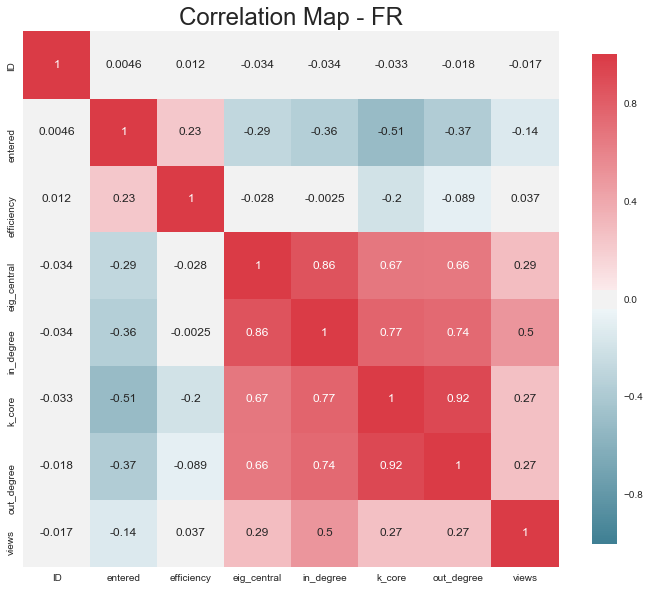

In [38]:
plot_correlation_map(fr_n, "Correlation Map - FR")

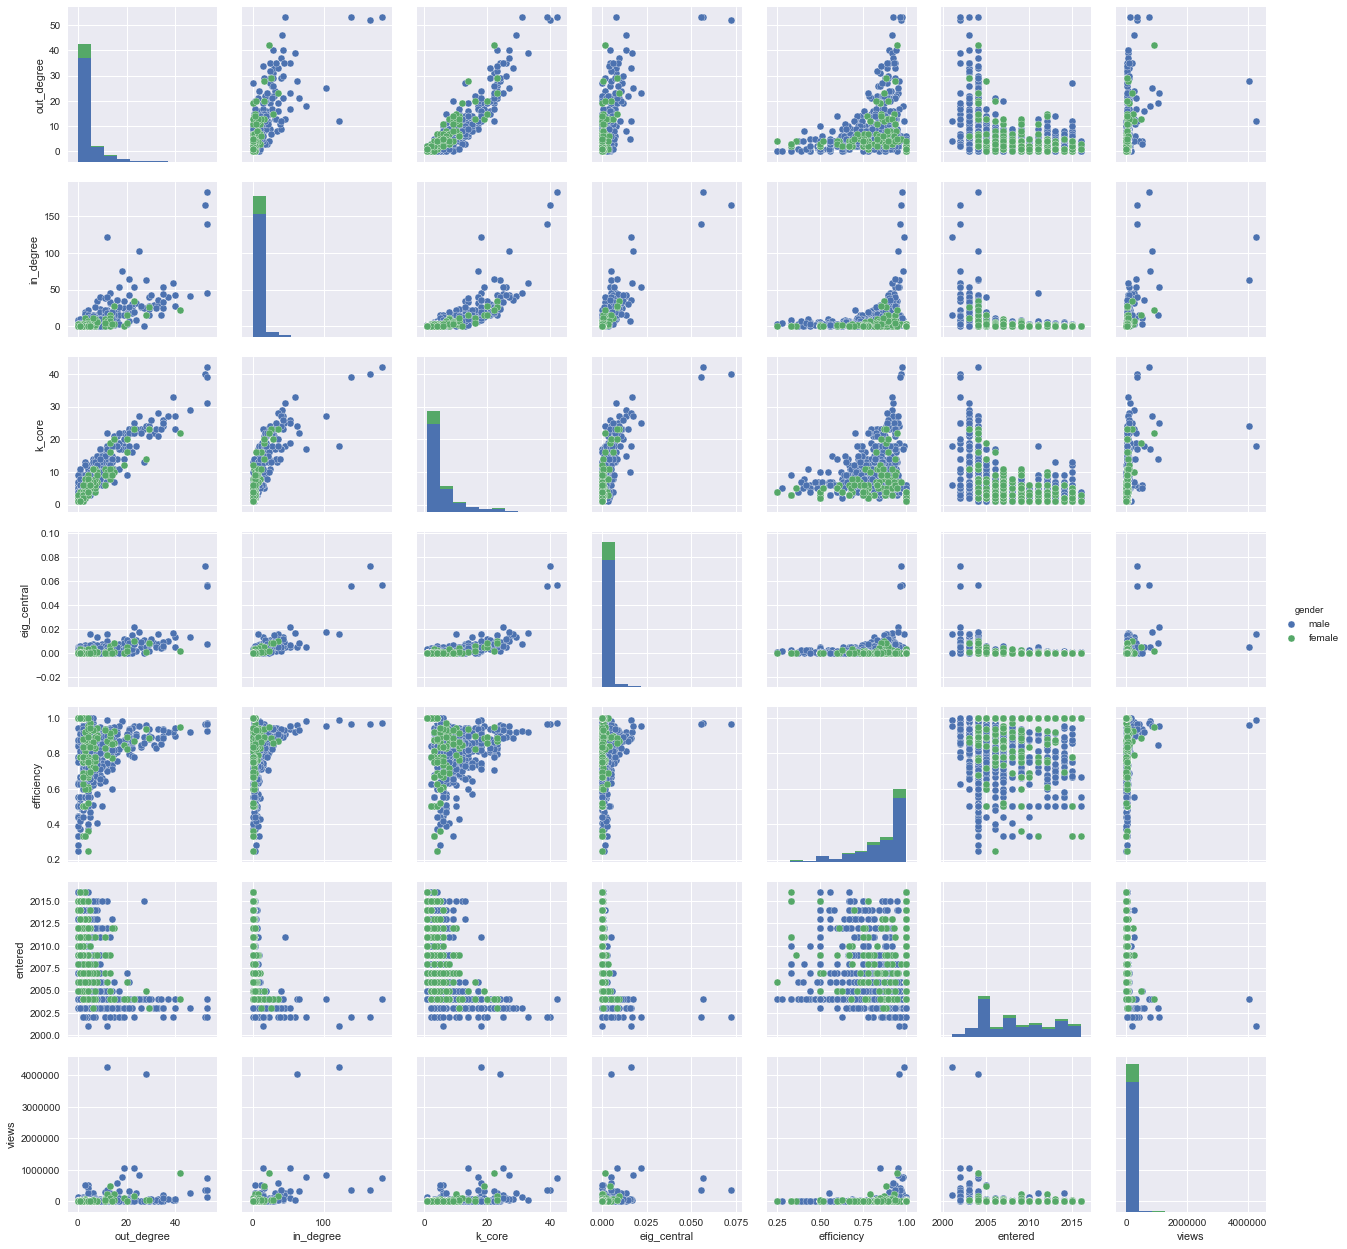

In [49]:
sns.pairplot(fr[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

In [51]:
fr.views.describe().apply(lambda x: format(x, 'f'))

count       1507.000000
mean       22062.402787
std       166545.024183
min          452.000000
25%         1263.000000
50%         2317.000000
75%         7561.500000
max      4255497.000000
Name: views, dtype: object

In [58]:
print_most_frequent(fr, 15, ["occupation", "party"])

[('writer', 157), ('scientist', 89), ('journalist', 56), ('historian', 33), ('economist', 23), ('lawyer', 22), ('physician', 20), ('novelist', 13), ('sportsperson', 12), ('lawyer politician', 11), ('mathematician', 10), ('minister of defence (france)', 10), ('player', 8), ('actor', 7), ('screenwriter', 5)]
                                               0    1
0                   union for a popular movement  164
1                       socialist party (france)  137
2                       the republicans (france)   53
3                           quebec liberal party   25
4                         radical party (france)   24
5                                parti québécois   23
6                         rally for the republic   22
7                     union for french democracy   16
8                         french communist party   16
9   french section of the workers' international   15
10                                bloc québécois   14
11                       national front (fra

# Great Britain

In [40]:
len(gb)

470

In [41]:
gb.gender.value_counts()

male      396
female     66
Name: gender, dtype: int64

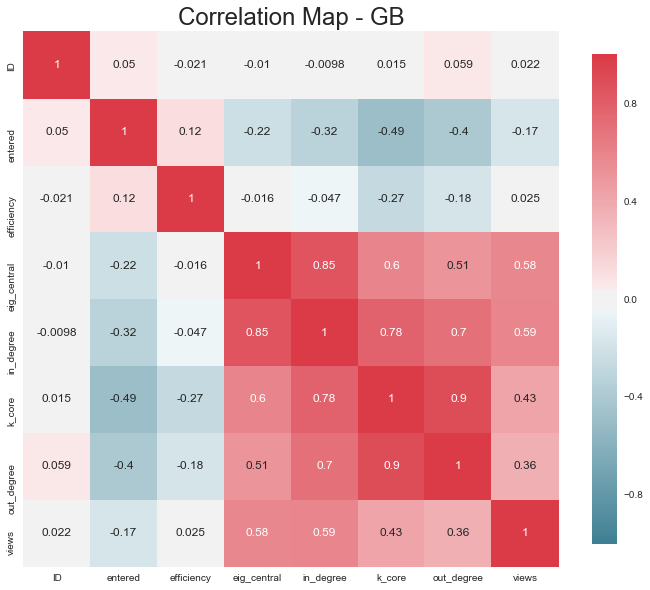

In [42]:
plot_correlation_map(gb_n, "Correlation Map - GB")

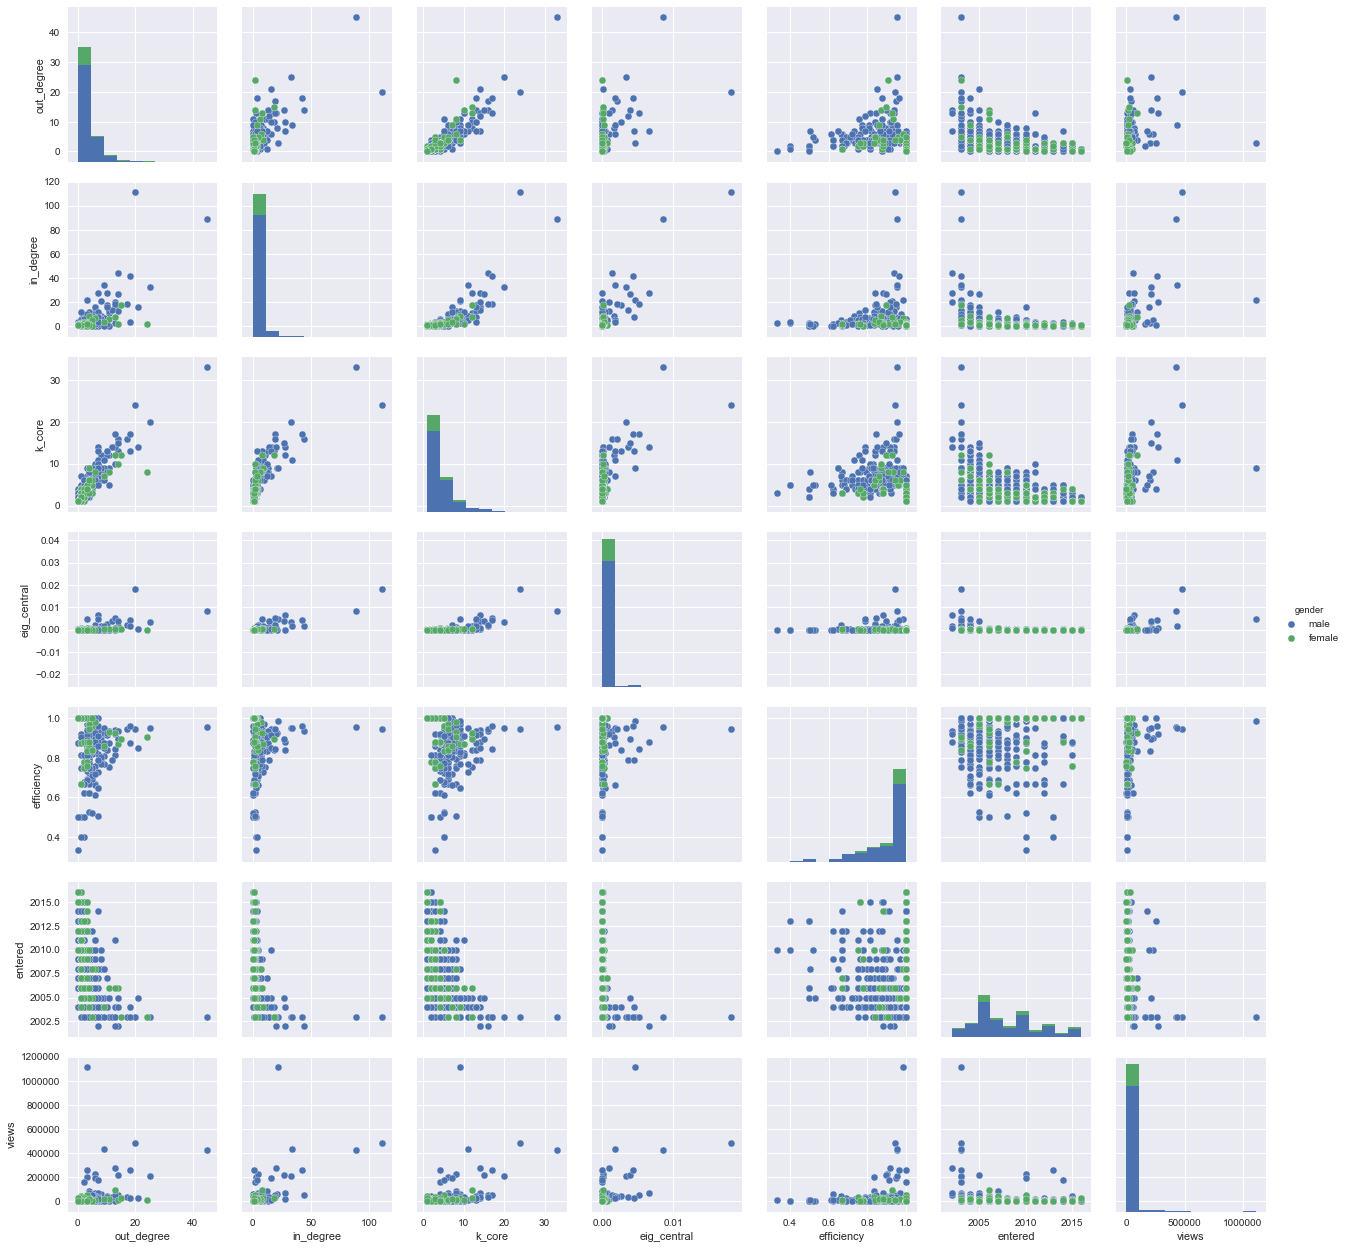

In [48]:
sns.pairplot(gb[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

In [53]:
gb.views.describe().apply(lambda x: format(x, 'f'))

count        470.000000
mean       19527.576596
std        69523.635456
min          627.000000
25%         2617.000000
50%         5940.500000
75%        11837.250000
max      1112437.000000
Name: views, dtype: object

In [59]:
print_most_frequent(gb, 15, ["occupation", "party"])

[('writer', 22), ('journalist', 16), ('barrister', 10), ('scientist', 9), ('businessperson', 9), ('historian', 6), ('member of parliament', 6), ('sportsperson', 3), ('lawyer', 3), ('physician', 3), ('businessman', 3), ('farmer', 2), ('cornwall council', 2), ('mechanic', 2), ('economist', 2)]
                                                  0   1
0                                 labour party (uk)  97
1                           conservative party (uk)  83
2                             ulster unionist party  52
3                         democratic unionist party  41
4                                 liberal democrats  18
5                                liberal party (uk)  17
6                             uk independence party  15
7                               labour co-operative  10
8                            independent politician   9
9                  gibraltar socialist labour party   6
10  association for the advancement of civil rights   5
11                           britis

# Russia

In [45]:
len(ru)

571

In [46]:
ru.gender.value_counts()

male      516
female     45
Name: gender, dtype: int64

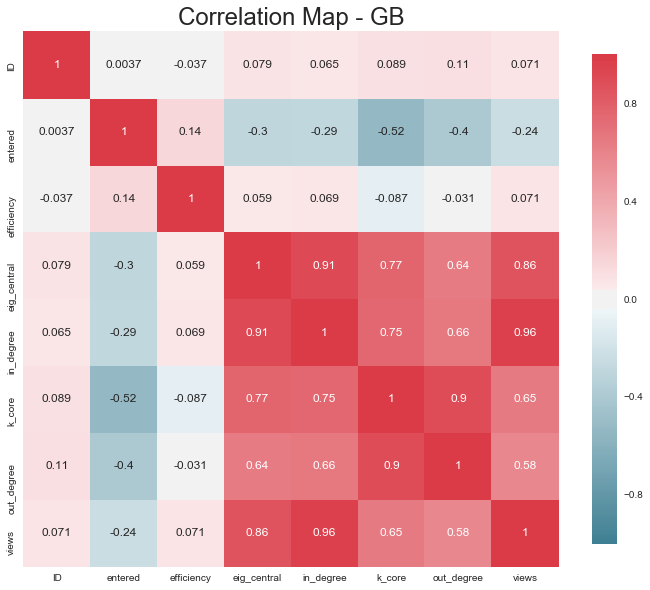

In [47]:
plot_correlation_map(ru_n, "Correlation Map - GB")

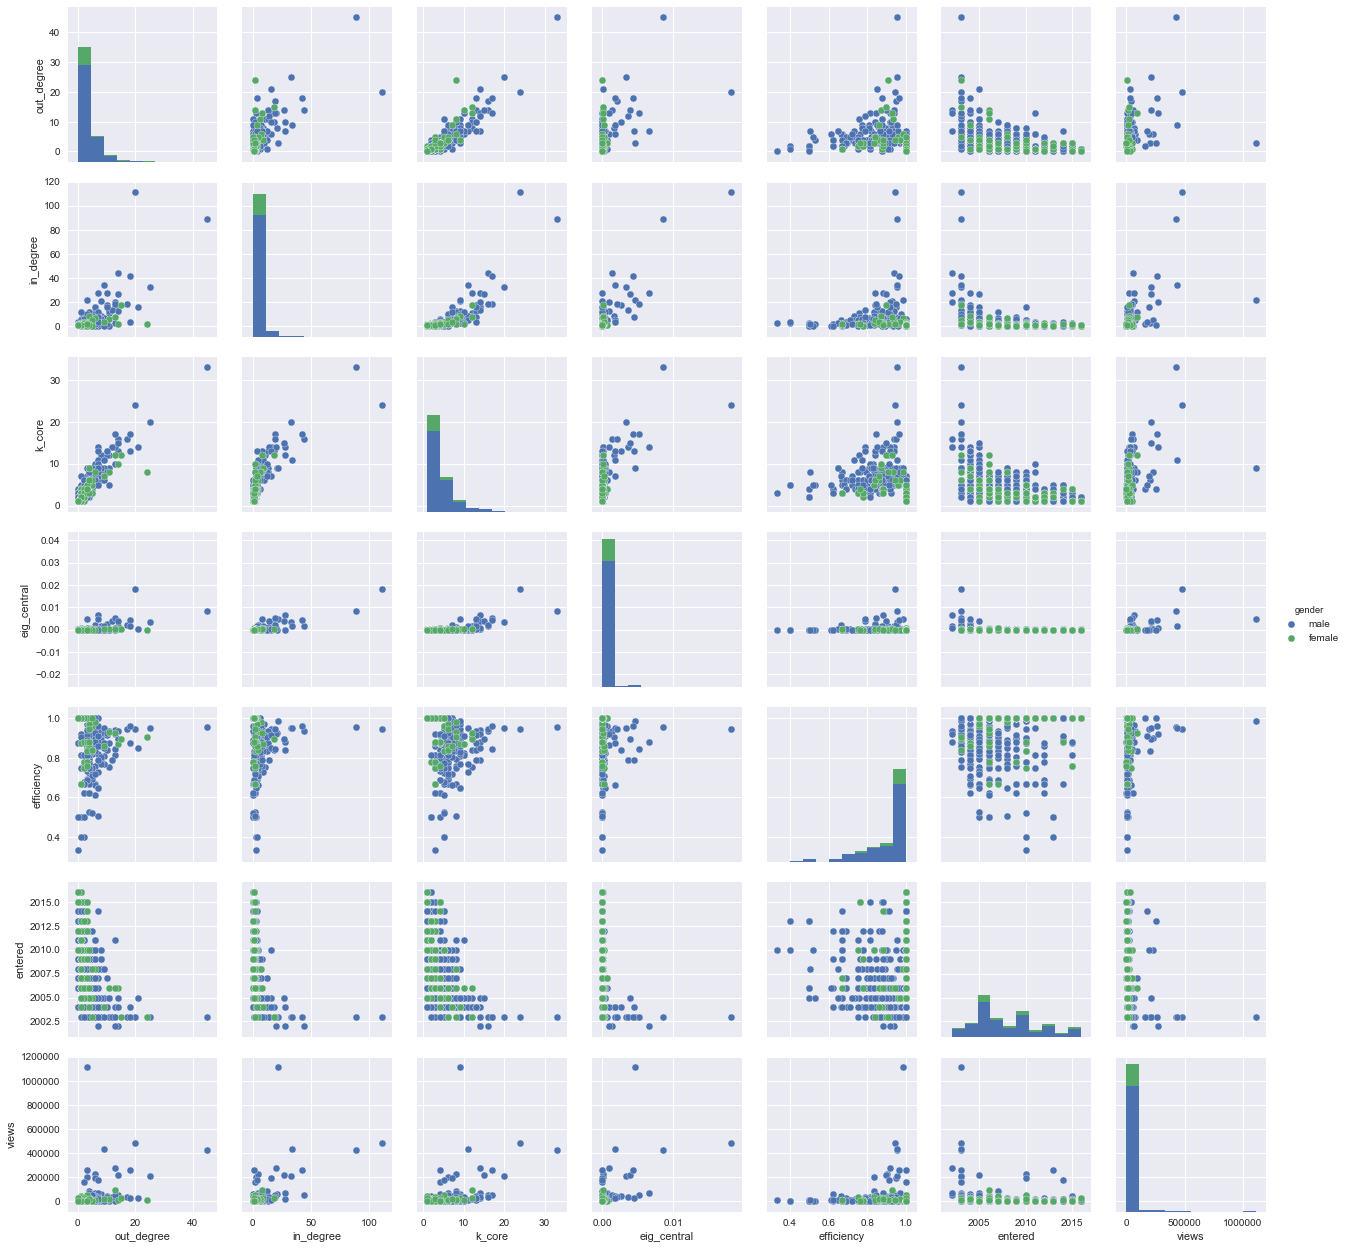

In [54]:
sns.pairplot(gb[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

In [52]:
ru.views.describe().apply(lambda x: format(x, 'f'))

count        571.000000
mean       57564.208406
std       347461.377116
min          412.000000
25%         2233.500000
50%         4924.000000
75%        14797.000000
max      5570912.000000
Name: views, dtype: object

In [61]:
print_most_frequent(ru, 15, ["occupation", "party"])

[('writer', 69), ('scientist', 67), ('journalist', 36), ('economist', 26), ('historian', 19), ('sportsperson', 13), ('actor', 9), ('physicist', 7), ('player', 7), ('novelist', 6), ('coach', 5), ('revolutionary', 4), ('lawyer', 4), ('civil service', 3), ('diplomat', 3)]
                                              0   1
0           communist party of the soviet union  72
1                                 united russia  52
2                        independent politician  16
3                                    bolsheviks   9
4        russian social democratic labour party   7
5                                       yabloko   6
6                                 a just russia   6
7                             our home – russia   5
8                        people's freedom party   5
9                         union of right forces   4
10           liberal democratic party of russia   4
11            armenian revolutionary federation   3
12              unity (russian political party)   3
13